# HR Data Analysis and Churn Prediction using Logistic Regression

In this excercise, I will be analyzing the HR Data and try to predict if an employee is likely to leave the organization based on key factors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_hr = pd.read_csv('HR_comma_sep.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
sal_dumm = pd.get_dummies(df_hr.salary)
merge1 = pd.concat([df_hr,sal_dumm], axis=1)
merge1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,False,True,False
1,0.80,0.86,5,262,6,0,1,0,sales,medium,False,False,True
2,0.11,0.88,7,272,4,0,1,0,sales,medium,False,False,True
3,0.72,0.87,5,223,5,0,1,0,sales,low,False,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,False,True,False


In [4]:
# Checking overall column level stats
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Checking the column names
df_hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Checking for the Null Values in all the columns
df_hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
# Checking Unique values
df_hr.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
df_hr[df_hr.select_dtypes(include=object).columns] = df_hr[df_hr.select_dtypes(include=object).columns].apply(le.fit_transform)
df_hr.head()
# Checking the correlation between the columns
df_hr.corr()
# Plotting the correlation matrix  

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
Department,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


In [10]:
# Finding correlation among variables
df_hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
Department,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


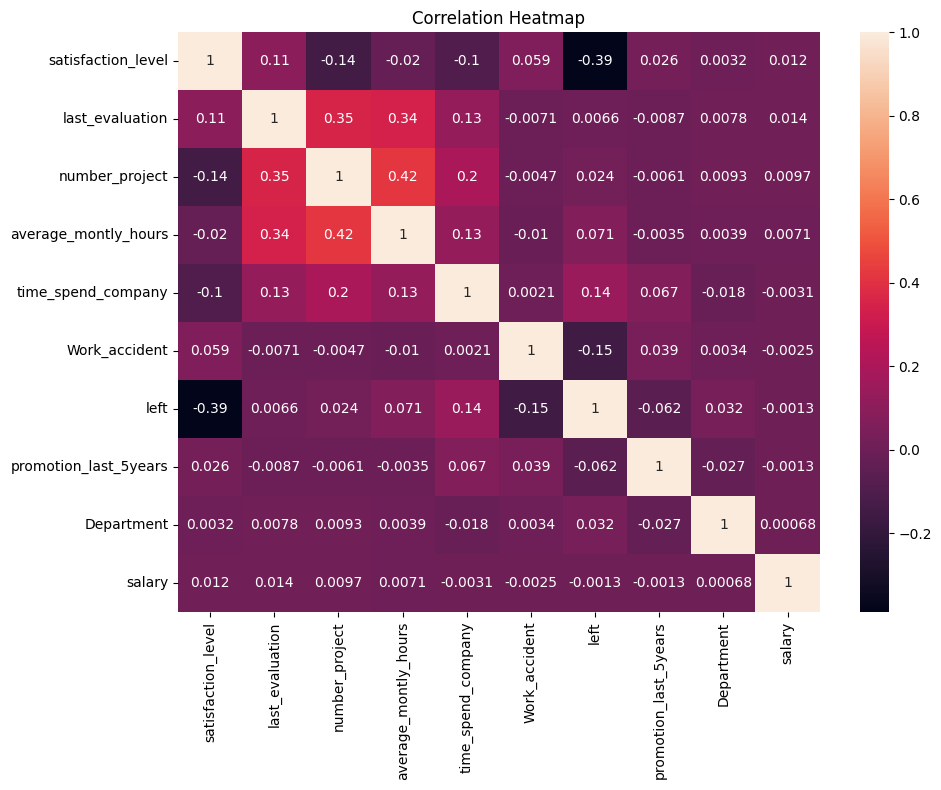

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_hr.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [12]:
df_hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


We can observe that 'Satisfaction Level', 'Average Monthly Hours', 'Promotion in last 5 years' contributes significantly to employees leaving the company

Text(0.5, 1.0, 'People with Lower Salary are leaving organiztion the most')

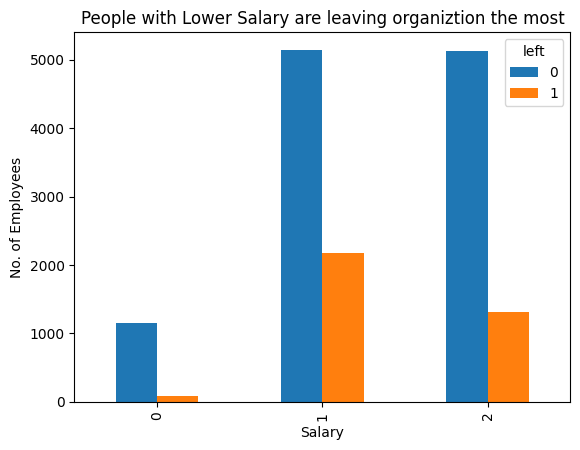

In [13]:
pd.crosstab(df_hr.salary,df_hr.left).plot(kind='bar')
plt.ylabel('No. of Employees')
plt.xlabel('Salary')
plt.title('People with Lower Salary are leaving organiztion the most')

Employees with low income tend to leave the company higher than those with higher income

Text(0, 0.5, 'Number of Employees')

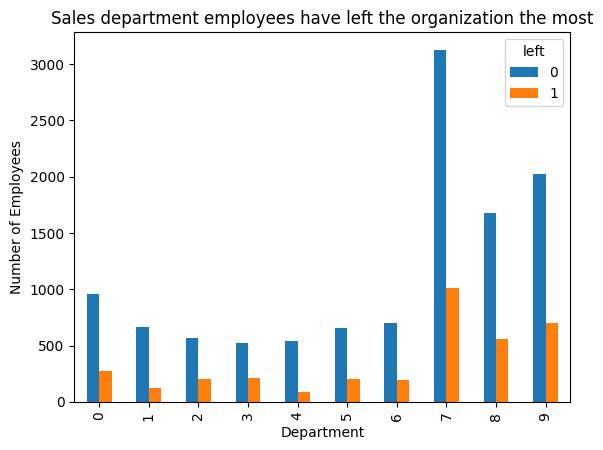

In [14]:
pd.crosstab(df_hr.Department,df_hr.left).plot(kind='bar')
plt.xlabel('Department')
plt.title('Sales department employees have left the organization the most')
plt.ylabel('Number of Employees')

In [15]:
# Checking the distribution of the data
df_sub = df_hr[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df_sub.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1


In [16]:
# Creating Predictor variables by scaling
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X = min_max.fit_transform(df_hr.drop(['left'], axis=1))
y = df_hr['left']
X = pd.DataFrame(X, columns=df_hr.columns[:-1])
y = pd.DataFrame(y, columns=['left'])

In [17]:
# Splitting Training and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=123)

In [18]:
# Creating Logistic regression Object
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [19]:
log_reg.fit(X_train,y_train)
# Predicting the values
y_pred = log_reg.predict(X_test)


/Users/dbn/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dbn/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dbn/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dbn/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dbn/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul


In [20]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of the model is :', accuracy)


Accuracy of the model is : 0.762


In [21]:
# Checking the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
print('Confusion Matrix :\n', confusion)
# Checking the classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test,y_pred)
print('Classification Report :\n', class_report)


Confusion Matrix :
 [[3170  259]
 [ 812  259]]
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      3429
           1       0.50      0.24      0.33      1071

    accuracy                           0.76      4500
   macro avg       0.65      0.58      0.59      4500
weighted avg       0.73      0.76      0.73      4500



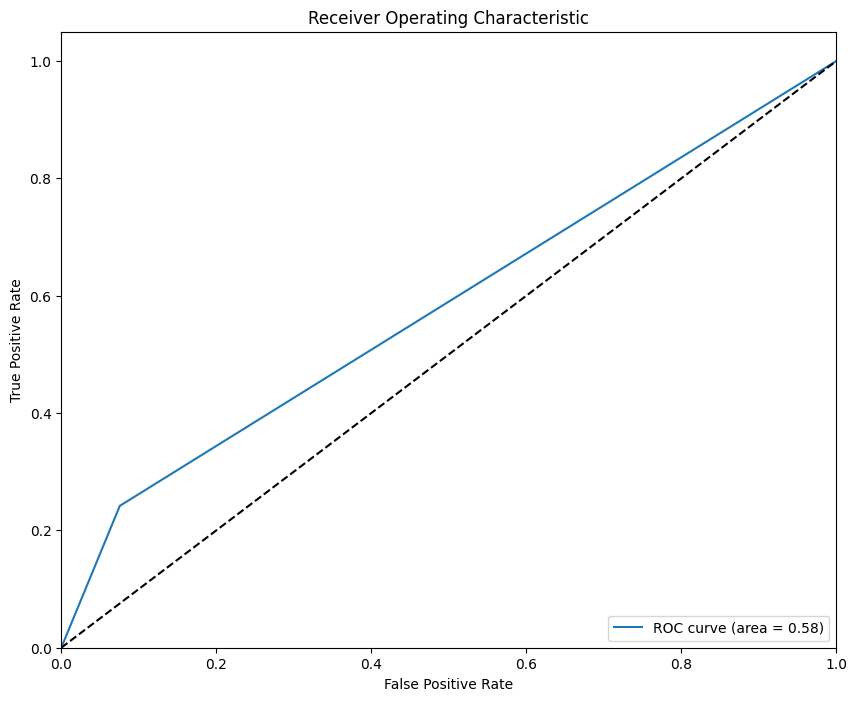

In [22]:
# Checking the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


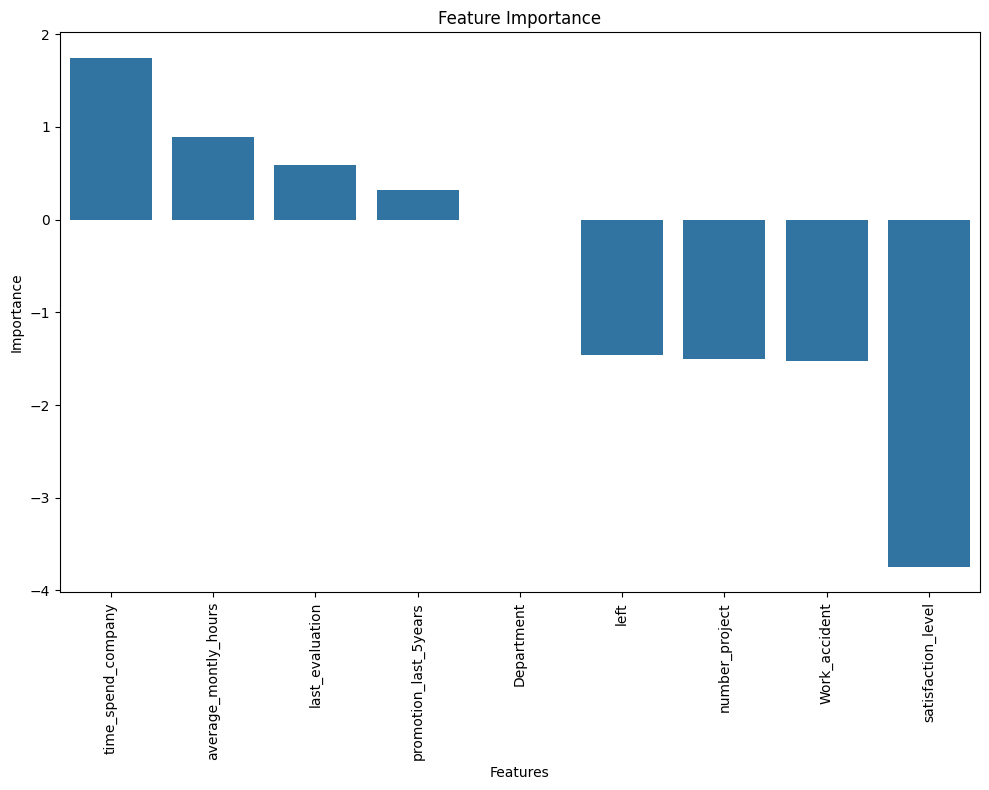

In [23]:
# Checking the feature importance
importance = log_reg.coef_[0]
feature_importance = pd.DataFrame(importance, index=X.columns, columns=['importance'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_importance.index, y=feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
# Predicting values using Train data
pred_train = log_reg.predict(X_train)

/Users/dbn/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/dbn/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/dbn/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [25]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(pred_train,y_train)

0.7683588913229832

In [26]:
# Predicting values using Test data
pred_test = log_reg.predict(X_test)

/Users/dbn/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/dbn/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/dbn/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [27]:
# Test data Accuracy score
accuracy_score(pred_test,y_test)

0.762

Here we can observe that our model is giving us around 77% accuracy for predicting if an employee is likely to leave the company or not.